<a href="https://colab.research.google.com/github/AndrewStaines/AIML/blob/main/PandasWorkSheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the pandas libraries
import pandas as pd

Read the data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nunnarilabs/ml/master/Loan_Payment_Dataset/loans.csv')
data

,id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373,A
1,4961,19,1996-04-29,30276,12,2523,B
2,4962,25,1997-12-08,30276,12,2523,A
3,4967,37,1998-10-14,318480,60,5308,D
4,4968,38,1998-04-19,110736,48,2307,C
...,...,...,...,...,...,...,...
677,7294,11327,1998-09-27,39168,24,1632,C
678,7295,11328,1998-07-18,280440,60,4674,C
679,7304,11349,1995-10-29,419880,60,6998,C
680,7305,11359,1996-08-06,54024,12,4502,A


**Description**:
The "Financial Transactions" dataset contains information about various financial transactions conducted by different account holders. The dataset consists of 682 rows and 7 columns, each representing different attributes related to the transactions. The data spans over a period from 1994 to 1998.

1)id: A unique identifier for each transaction.

2)account_id: The ID associated with the account involved in the transaction.

3)date: The date when the transaction took place.

4)amount: The monetary amount of the transaction.

5)duration: The duration of the transaction in months.

6)payments: The number of payments made for the transaction.

7)status: The status code indicating the state of the transaction in terms of payment basis.

      -"A": Transaction is active and payments are up-to-date.
      
      -"B": Transaction is active with a minor delay in payments.
      
      -"C": Transaction is active, but there is a notable delay in payments.

## 1.)After Reading the dataset

In [ ]:
# a) Print the first 10 rows

data.head(10)

,id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373,A
1,4961,19,1996-04-29,30276,12,2523,B
2,4962,25,1997-12-08,30276,12,2523,A
3,4967,37,1998-10-14,318480,60,5308,D
4,4968,38,1998-04-19,110736,48,2307,C
5,4973,67,1996-05-02,165960,24,6915,A
6,4986,97,1997-08-10,102876,12,8573,A
7,4988,103,1997-12-06,265320,36,7370,D
8,4989,105,1998-12-05,352704,48,7348,C
9,4990,110,1997-09-08,162576,36,4516,C


In [ ]:
# b) Gain Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          682 non-null    int64 
 1   account_id  682 non-null    int64 
 2   date        682 non-null    object
 3   amount      682 non-null    int64 
 4   duration    682 non-null    int64 
 5   payments    682 non-null    int64 
 6   status      682 non-null    object
dtypes: int64(5), object(2)
memory usage: 37.4+ KB


In [ ]:
# c) Describe the data for better Understanding
data.describe()


,id,account_id,amount,duration,payments
count,682.000000,682.000000,682.000000,682.000000,682.000000
mean,6172.466276,5824.162757,151410.175953,36.492669,4190.664223
std,682.579279,3283.512681,113372.406310,17.075219,2215.830344
min,4959.000000,2.000000,4980.000000,12.000000,304.000000
25%,5577.500000,2967.000000,66732.000000,24.000000,2477.000000
50%,6176.500000,5738.500000,116928.000000,36.000000,3934.000000
75%,6752.500000,8686.000000,210654.000000,48.000000,5813.500000
max,7308.000000,11362.000000,590820.000000,60.000000,9910.000000


#Let us go the story

1) I am a data analyst at a Bank who has the loan payment data and I need to know about the person who is regularly paying(status) over the long period of Time(Duration)

In [ ]:
#Hint:I want the id who has higest status with more duration.
#Step 1: Filter rows with the highest status.
highest_status =data.sort_values(['status'])

In [ ]:
#step 2: Find the row with the longest duration among the highest status rows
highest_status_longest_duration =highest_status.sort_values(['duration'])

In [ ]:
#step 3: Get the id of the row with the highest status and longest duration
id_with_highest_status_longest_duration = highest_status_longest_duration['id']

print("ID with Highest Status and Longest Duration:", id_with_highest_status_longest_duration)

ID with Highest Status and Longest Duration: 587    6998
646    7201
644    7199
643    7198
567    6942
       ... 
387    6346
385    6338
612    7100
608    7088
340    6175
Name: id, Length: 682, dtype: int64


2) Now I want to know about the payments of the above person

In [ ]:
#I want the payments of the ID who has highest_status in longest_duration
#Step 1: Find the entry with the highest status and longest duration
max_status_entry = highest_status_longest_duration

#Step 2: Retrieve the account_id for the selected entry
account_id_highest_status_longest_duration = highest_status_longest_duration[['account_id','payments']]
#Step 3: Find the person's payments based on their account_id
person_payments = account_id_highest_status_longest_duration.payments
person_payments

587    8136
646    5622
644    3814
643    3814
567    1527
       ... 
387    1671
385    6511
612    5802
608    3986
340    4845
Name: payments, Length: 682, dtype: int64

3) It is my responsibility to check the  people who are irregular in paying the money

In [ ]:
##(Hint) find the id's who has low status

low_status_ids = data[['id','status']].sort_values(['status'])

,id,status
0,4959,A
374,6306,A
371,6297,A
367,6279,A
362,6253,A
...,...,...
358,6239,D
463,6625,D
276,5976,D
583,6986,D


4) I can't maintain everyone I want to see the people who is not paying the money often and duration given to him

In [ ]:
#Step 1: Calculate the average payments for each account_id
average_payments = data.groupby('account_id').payments.mean()

In [ ]:
#Step 2: Filter the accounts with average payments below a certain threshold
threshold = 1000  # You can adjust this threshold(money considering point) as needed
accounts_below_threshold = average_payments[average_payments < threshold]
accounts_below_threshold['account_id']=accounts_below_threshold.index

In [ ]:
#Step 3 Get the corresponding records from the original DataFrame
result = data[data.account_id in accounts_below_threshold.account_id]

print("Accounts with Below-Threshold Payments:")
print(result)

TypeError: ignored

5) My View is more on the people with less time to pay

In [ ]:
df_sorted_by_duration =data.sort_values(['duration'])
# Filter the DataFrame to show records with the shortest durations
shortest_durations = df_sorted_by_duration.iloc[0]
shortest_durations

id                  6730
account_id          8523
date          1998-02-15
amount             93036
duration              12
payments            7753
status                 C
Name: 501, dtype: object

Hurray!!! found the people

6)Now We can find from which year people started buying loan

### Note:
If the date is not in datetime format kindly convert using the below code

```
df['date'] = pd.to_datetime(df['date'])
```



In [ ]:
#Step 1: Convert the 'date' column to datetime
data['date'] =pd.to_datetime(data['date'])
data

,id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373,A
1,4961,19,1996-04-29,30276,12,2523,B
2,4962,25,1997-12-08,30276,12,2523,A
3,4967,37,1998-10-14,318480,60,5308,D
4,4968,38,1998-04-19,110736,48,2307,C
...,...,...,...,...,...,...,...
677,7294,11327,1998-09-27,39168,24,1632,C
678,7295,11328,1998-07-18,280440,60,4674,C
679,7304,11349,1995-10-29,419880,60,6998,C
680,7305,11359,1996-08-06,54024,12,4502,A


In [ ]:
#Step 2: Create a column year which contains the year of every data
data['Year'] = data['date'].dt.year
data['Year']

0      1994
1      1996
2      1997
3      1998
4      1998
       ... 
677    1998
678    1998
679    1995
680    1996
681    1996
Name: Year, Length: 682, dtype: int64

In [ ]:
#Step 3: Find the minimum year from the 'date' column
start_year = data.sort_values(['Year']).Year.min()

print("Year when people started buying loans:", start_year)

Year when people started buying loans: 1993


7) Visualization the data is more important.I want to show Total Transaction Amounts Over Years to my manager



<ipython-input-85-9c37804bc434>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_amounts = data.groupby('Year').sum()


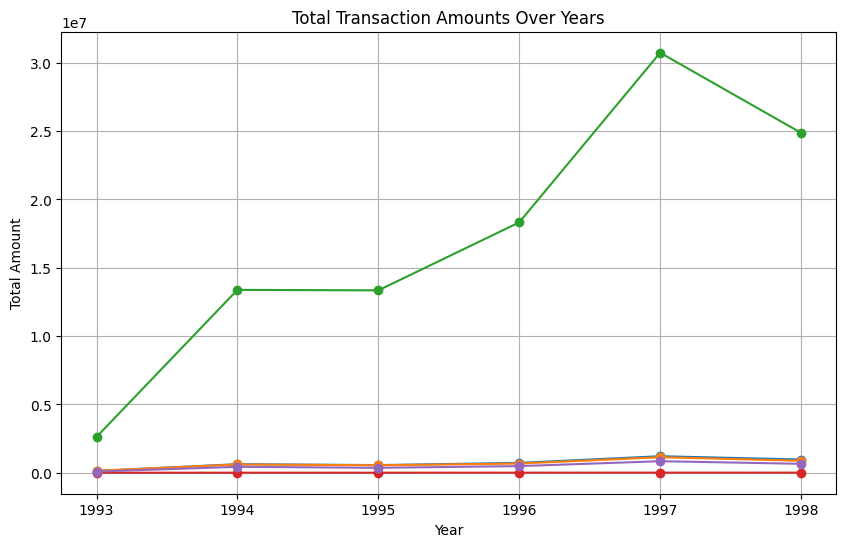

In [ ]:
#Import the matplot library

# Group the data by Year and calculate total transaction amount for each year
yearly_amounts = data.groupby('Year').sum()

# Create a plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(yearly_amounts.index, yearly_amounts.values, marker='o')
plt.title('Total Transaction Amounts Over Years')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()